# CRISP-DM 1 – İş Probleminin Tanımlanması

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


# CRISP-DM 2

In [22]:
df = pd.read_csv("Data/Birleştirilmiş_veri .csv")
df.head()


,Yıl,Deprem,Heyelan,Orman Yangını,Çığ / Kar Tipi Yağışı,Maden Kazası,Su Baskını,Diğer,Toplam
0,2020,331,107,-,11,-,177,270,905
1,2022,21054,859,-,18,-,450,451,22982
2,2023,830,564,711,93,7,2028,-,5233
3,2024,194,332,5321,83,19,1818,-,7767


In [23]:
df.head()

,Yıl,Deprem,Heyelan,Orman Yangını,Çığ / Kar Tipi Yağışı,Maden Kazası,Su Baskını,Diğer,Toplam
0,2020,331,107,-,11,-,177,270,905
1,2022,21054,859,-,18,-,450,451,22982
2,2023,830,564,711,93,7,2028,-,5233
3,2024,194,332,5321,83,19,1818,-,7767


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Yıl                    4 non-null      int64 
 1   Deprem                 4 non-null      int64 
 2   Heyelan                4 non-null      int64 
 3   Orman Yangını          4 non-null      object
 4   Çığ / Kar Tipi Yağışı  4 non-null      int64 
 5   Maden Kazası           4 non-null      object
 6   Su Baskını             4 non-null      int64 
 7   Diğer                  4 non-null      object
 8   Toplam                 4 non-null      int64 
dtypes: int64(6), object(3)
memory usage: 420.0+ bytes


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıl,4.0,2022.25,1.707825,2020.0,2021.50,2022.5,2023.25,2024.0
Deprem,4.0,5602.25,10304.791648,194.0,296.75,580.5,5886.00,21054.0
Heyelan,4.0,465.50,321.915620,107.0,275.75,448.0,637.75,859.0
Çığ / Kar Tipi Yağışı,4.0,51.25,42.726846,11.0,16.25,50.5,85.50,93.0
Su Baskını,4.0,1118.25,939.823521,177.0,381.75,1134.0,1870.50,2028.0
Toplam,4.0,9221.75,9601.028326,905.0,4151.00,6500.0,11570.75,22982.0


In [26]:
df.isna().sum()

Yıl                      0
Deprem                   0
Heyelan                  0
Orman Yangını            0
Çığ / Kar Tipi Yağışı    0
Maden Kazası             0
Su Baskını               0
Diğer                    0
Toplam                   0
dtype: int64

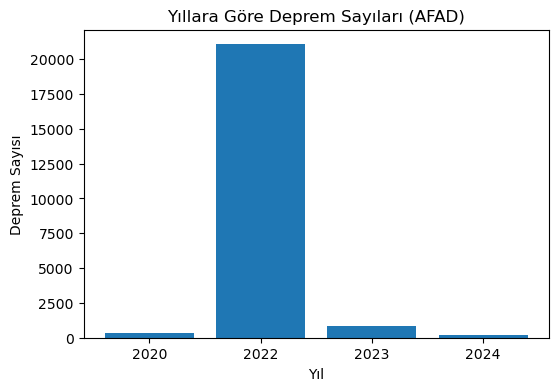

In [27]:
plt.figure(figsize=(6,4))
plt.bar(df["Yıl"].astype(str), df["Deprem"])
plt.xlabel("Yıl")
plt.ylabel("Deprem Sayısı")
plt.title("Yıllara Göre Deprem Sayıları (AFAD)")
plt.show()

# CRISP-DM 3

In [28]:
df_clean = df.replace("-", np.nan)

In [29]:

numeric_cols = ["Deprem", "Heyelan", "Toplam", "Yıl",
                "Orman Yangını", "Çığ / Kar Tipi Yağışı",
                "Maden Kazası", "Su Baskını", "Diğer"]

In [30]:
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

In [31]:
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(0)

df_clean

,Yıl,Deprem,Heyelan,Orman Yangını,Çığ / Kar Tipi Yağışı,Maden Kazası,Su Baskını,Diğer,Toplam
0,2020,331,107,0.0,11,0.0,177,270.0,905
1,2022,21054,859,0.0,18,0.0,450,451.0,22982
2,2023,830,564,711.0,93,7.0,2028,0.0,5233
3,2024,194,332,5321.0,83,19.0,1818,0.0,7767


# CRISP-DM 4:


In [32]:
mean_dep = df_clean["Deprem"].mean()
std_dep  = df_clean["Deprem"].std(ddof=0)   # ddof=0: populasyon std

print("Deprem Ortalaması  :", mean_dep)
print("Deprem Standart Sapması :", std_dep)

Deprem Ortalaması  : 5602.25
Deprem Standart Sapması : 8924.211348208872


In [33]:
# Z-Score hesapla
df_clean["Z_deprem"] = (df_clean["Deprem"] - mean_dep) / std_dep

In [34]:
threshold = 1.3

def label_anomaly(z):
    if z > threshold or z < -threshold:
        return "Anomali"
    else:
        return "Normal"

df_clean["Anomali_Durumu"] = df_clean["Z_deprem"].apply(label_anomaly)


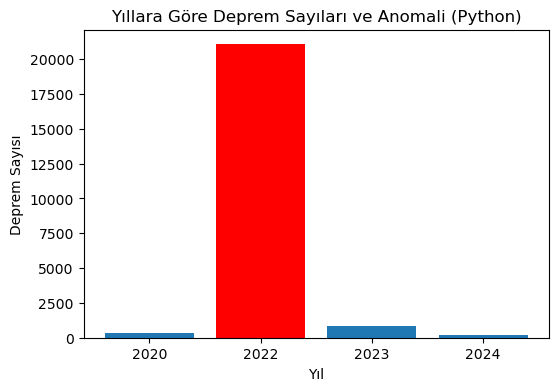

In [35]:

plt.figure(figsize=(6,4))
colors = np.where(df_clean["Anomali_Durumu"]=="Anomali", "red", "C0")
plt.bar(df_clean["Yıl"].astype(str), df_clean["Deprem"], color=colors)
plt.xlabel("Yıl")
plt.ylabel("Deprem Sayısı")
plt.title("Yıllara Göre Deprem Sayıları ve Anomali (Python)")
plt.show()

# CRISP-DM 5:

In [36]:
print("=== Anomali Modeli Çıktıları ===")
display(df_clean[["Yıl", "Deprem", "Z_deprem", "Anomali_Durumu"]])
print("\nDeprem ortalaması :", mean_dep)
print("Deprem standart sapması :", std_dep)
print("Kullanılan Z-score eşiği (|Z| >", 1.3, ")")

=== Anomali Modeli Çıktıları ===


,Yıl,Deprem,Z_deprem,Anomali_Durumu
0,2020,331,-0.590668,Normal
1,2022,21054,1.731442,Anomali
2,2023,830,-0.534753,Normal
3,2024,194,-0.606020,Normal



Deprem ortalaması : 5602.25
Deprem standart sapması : 8924.211348208872
Kullanılan Z-score eşiği (|Z| > 1.3 )


In [37]:
# === Çoklu Anomali Modeli: Z-Score + Isolation Forest ===

from sklearn.ensemble import IsolationForest

# Özellik sütunları (Yıl hariç)
feature_cols = ["Deprem", "Heyelan", "Orman Yangını",
                "Çığ / Kar Tipi Yağışı", "Su Baskını",
                "Maden Kazası", "Diğer"]

X = df_clean[feature_cols]

# -------------------------------------------------
# MODEL 1: Z-SCORE (istatistiksel model) - Deprem
# -------------------------------------------------

mean_dep = df_clean["Deprem"].mean()
std_dep  = df_clean["Deprem"].std(ddof=0)

df_clean["Z_deprem"] = (df_clean["Deprem"] - mean_dep) / std_dep

z_threshold = 1.3  # küçük veri için eşik

df_clean["Z_label"] = np.where(
    (df_clean["Z_deprem"] > z_threshold) | (df_clean["Z_deprem"] < -z_threshold),
    "Anomali",
    "Normal"
)

# -------------------------------------------------
# MODEL 2: Isolation Forest (ağaç tabanlı model)
# -------------------------------------------------

iforest = IsolationForest(
    contamination=0.25,      # 4 gözlemden 1'ini anomali bekliyoruz
    random_state=42
)

df_clean["IF_pred"] = iforest.fit_predict(X)        # 1 = normal, -1 = anomali
df_clean["IF_label"] = np.where(df_clean["IF_pred"] == -1, "Anomali", "Normal")

# -------------------------------------------------
# KARŞILAŞTIRMA TABLOSU
# -------------------------------------------------

df_models = df_clean[[
    "Yıl", "Deprem",
    "Z_deprem", "Z_label",
    "IF_label"
]]

print("=== Z-Score ve Isolation Forest Karşılaştırması ===")
display(df_models)


=== Z-Score ve Isolation Forest Karşılaştırması ===


,Yıl,Deprem,Z_deprem,Z_label,IF_label
0,2020,331,-0.590668,Normal,Normal
1,2022,21054,1.731442,Anomali,Normal
2,2023,830,-0.534753,Normal,Normal
3,2024,194,-0.606020,Normal,Anomali


In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

models = {
    "IsolationForest": IsolationForest(contamination=0.25, random_state=42),
    "LOF": LocalOutlierFactor(contamination=0.25, n_neighbors=2),
    "OneClassSVM": OneClassSVM(nu=0.25, kernel="rbf")
}

results = {}

for name, model in models.items():
    try:
        if name == "LOF":
            pred = model.fit_predict(X)
        else:
            model.fit(X)
            pred = model.predict(X)
        results[name] = pred
        print(f"{name} çalıştı!")
    except:
        print(f"{name} çalıştırılamadı")

results


IsolationForest çalıştı!
LOF çalıştırılamadı
OneClassSVM çalıştı!


{'IsolationForest': array([ 1,  1,  1, -1]),
 'OneClassSVM': array([-1,  1,  1,  1], dtype=int64)}